# Import some stuff

In [1]:
%matplotlib inline
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from architecture.parameters.lstmParameters import LstmParameters
from architecture.simpleLSTMArchitecture import SimpleLSTMArchitecture
from system.lstmPreAndPostProcessor import LSTMPreAndPostProcessor
from system.lstmSystem import LSTMSystem

# Initialize the network

In [2]:
sessionsName = "test_newArch_moreRandom_"

batch_size = 64
params = LstmParameters(lstmSize=512, batchSize=batch_size, signalLength=5120, fftWindowLength=128, fftHopSize=32,
						countOfFrames=4)

aContextEncoderArchitecture = SimpleLSTMArchitecture(inputShape=(params.batchSize(),
																 params.fftFrames()-1,
																 params.fftFreqBins()), lstmParams=params)

aPreProcessor = LSTMPreAndPostProcessor(params)

aContextEncoderSystem = LSTMSystem(aContextEncoderArchitecture, batch_size, aPreProcessor, params, sessionsName)


# Create some spectrogram

In [3]:
sampling_rate = 16000
window_size = 5120
time = np.arange(0, window_size / sampling_rate, 1 / sampling_rate, dtype=np.float32)

audio = np.sin(2 * np.pi * 1960 * time) + np.sin(2 * np.pi * 2240 * time) + np.sin(2 * np.pi * 4480 * time) + np.sin(2 * np.pi * 7240 * time)

magSpectrogramOp  = tf.abs(tf.contrib.signal.stft(signals=audio, 
                                                  frame_length=params.fftWindowLength(), 
                                                  frame_step=params.fftHopSize()))
a=3                           
with tf.Session() as sess:
    magSpectrogram = sess.run(magSpectrogramOp)


(157, 65)


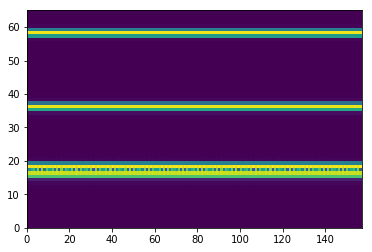

In [4]:
plt.pcolormesh(magSpectrogram.transpose())
print(magSpectrogram.shape)


In [5]:
generatedSpecs = aContextEncoderSystem.generate(magSpectrogram, length=24, model_num=650838)[0]

INFO:tensorflow:Restoring parameters from utils/saved_models/test_newArch_moreRandom_/model-test_newArch_moreRandom_650838.ckpt
Model restored.
(1, 181, 65)


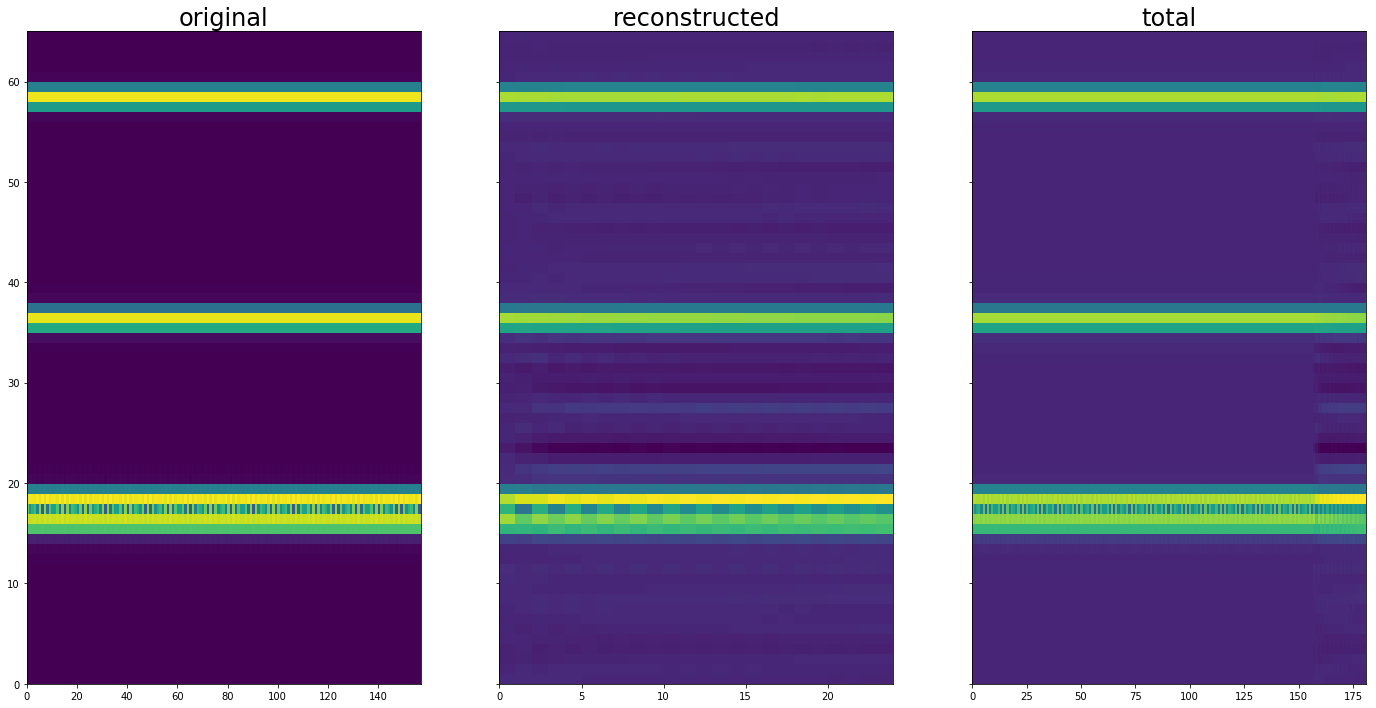

In [9]:
f, axarr = plt.subplots(1, 3, sharey='row', figsize=(24, 12))

axarr[0].pcolormesh(generatedSpecs[:157].transpose())
axarr[0].set_title('original', size=24)
axarr[1].pcolormesh(generatedSpecs[157:].transpose())
axarr[1].set_title('reconstructed', size=24)
axarr[2].pcolormesh(generatedSpecs.transpose())
axarr[2].set_title('total', size=24);

In [5]:
generatedSpecs.shape

(1, 160, 65)